# PROJETO DE MACHINE LEARNING - Revenda de Imóveis
### Este trabalho é focado no uso de alguns modelos de Machine Learning com aprendizado supervisionado e não-supervisionado. Foi um trabalho aplicado em um desafio feito para provimento de vaga para Cientista de Dados em uma empresa.

## CASE
Uma empresa alimentícia situada no RJ deseja abrir filiais na cidade deSão Paulo, tendo como público alvo adultos de 25 a 50 anos, das classes A (rendas A1 e A2) e B (rendas B1 e B2). Essa empresa já atua no Rio de Janeiro e antes de fazer o investimento quer estimar quanto poderia faturar em cada um dos bairros de São Paulo também. Como o mercado de São Paulo não é bem conhecido para essa empresa, ela deseja classificar os bairros de São Paulo para saber se o potencial é alto, médio ou baixo. Utilizando como base o potencial que
ela já conhece dos bairros do Rio de Janeiro. Os analistas dessa empresa também gostariam de segmentar os bairros de São Paulo de acordo com o perfil de renda e idade para direcionar ações de marketing diferenciadas. O contato dessa empresa também sinalizou que outras áreas da empresa possuem problemas muito parecidos com esse e que também devem procurar um Cientista de Dados. Internamente também temos recebido feedback da equipe comercial e eles dizem que outros clientes também estão procurando soluções como essa e que poderíamos utilizar as mesmas técnicas para criar um produto que resolva esse tipo de problema.

O Engenheiro de dados ajudou a extrair os dados de faturamento e potencial dos bairros do Rio de Janeiro provenientes do nosso cliente, juntamente com os dados de sociodemografia dos bairros do Rio de Janeiro e São Paulo. , como o Cientista de Dados, possa realizar as suas análises.

Agora, monte uma análise dos bairros de São Paulo para:
1. Estimar o faturamento que uma loja teria em cada um dos bairros
2. Classificar o potencial de cada bairro como Alto, Médio ou Baixo
3. Segmentar os bairros de São Paulo de acordo com a renda e aidade, e indicar aqueles com maior aderência ao público alvo.

Como resultado da análise, é necessário que seja gerado um documento (doc, pdf, ppt, etc) para pessoas não técnicas, apresentando um racional de como os dados foram analisados. Utilize gráficos, tabelas e descreva para apresentar as suas conclusões. Dado que as técnicas aplicadas podem ser utilizadas para outros clientes com problemas semelhantes, é necessário gerar também o código que te levou a essa análise. Isso se faz necessário pois a operacionalização será feita pelos nossos Engenheiros de Machine Learning juntamente com o time de desenvolvedores. Dessa forma, é necessário também o código que te levou às conclusões apresentadas. Outra coisa que gostaríamos de ouvir de você é: dado a natureza do problema apresentado, você conhece algum outro dado externo, de fontes públicas ou de fontes privadas, que poderiam ser utilizados para agregar mais valor para o resultado? Se sim, explique o por quê.

Dicionário dos dados:
- codigo: Código do bairro;
- nome: Nome do bairro;
- cidade: Cidade;
- estado: Estado;
- população: População total;
- popAte9: População - até 9 anos;
- popDe10a14: População - de 10 a 14 anos;
- popDe15a19: População - de 15 a 19 anos;
- popDe20a24: População - de 20 a 24 anos;
- popDe25a34: População - de 25 a 34 anos;
- popDe35a49: População - de 35 a 49 anos;
- popDe50a59: População - de 50 a 59 anos;
- popMaisDe60: População - 60 anos ou mais;
- domiciliosA1: Quantidade de Domicílios de Renda A1;
- domiciliosA2: Quantidade de Domicílios de Renda A2;
- domiciliosB1: Quantidade de Domicílios de Renda B1;
- domiciliosB2: Quantidade de Domicílios de Renda B2;
- domiciliosC1: Quantidade de Domicílios de Renda C1;
- domiciliosC2: Quantidade de Domicílios de Renda C2;
- domiciliosD: Quantidade de Domicílios de Renda D;
- domiciliosE: Quantidade de Domicílios de Renda E;
- rendaMedia: Renda Média por Domicílio;
- faturamento: Faturamento Total no Bairro;
- potencial: Potencial do Bairro.

## RESUMO
**A Empresa:**
- Atua no Rio de Janeiro.
- Quer abrir filiais em São Paulo.
- Tem como público alvo adultos de 25 a 50 anos, das classes A (rendas A1 e A2) e B (rendas B1 e B2).
- Quer estimar quanto poderia faturar em cada um dos bairros de São Paulo, classificando-os em potencial alto, médio ou baixo , utilizando como base o potencial que já conhece dos bairros do Rio de Janeiro.

**Os Analista da Empresa:**
- Gostariam de segmentar os bairros de São Paulo de acordo com o perfil de renda e idade.

## OBJETIVO
**Montar uma análise dos bairros de São Paulo para:**
1. Estimar o faturamento que uma loja teria em cada um dos bairros.
2. Classificar o potencial de cada bairro como Alto, Médio ou Baixo.
3. Segmentar os bairros de São Paulo de acordo com a renda e a idade, e indicar aqueles com maior aderência ao público alvo.

### MÓDULOS EM USO

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet, BayesianRidge, LogisticRegression, SGDClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from xgboost.sklearn import XGBRegressor, XGBClassifier
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import IsolationForest, ExtraTreesClassifier
from sklearn.svm import SVR, SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from itertools import product
import matplotlib.pyplot as plt
from scipy.stats import skewtest
import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

# 1. Pré-processamento dos dados
Como mostra o Dataset a seguir na forma original, temos um caso de amostra pequena. No processo de construção do modelo preditor para esse tamanho de amostra, as seguintes ações geralmente feitas:
1. Usar modelos simples ou complexos com simplificação por ajuste de parâmetros. Isso ajuda a reduzir sobreajuste.
2. Eliminação de outliers, pois costumam enviesar o resultado.
3. Selecionar as melhores features para simplificar ainda mais o modelo.
4. Balancear os dados (em modelo classificador).

No entanto, nesta seção iremos trabalhar apenas a parte de pré-processamento que ainda não compreende a engenharia de features, fazendo apenas uma organização e padronização de tipos de dados. Os itens acima serão abordados durante a construção dos modelos de predição de faturamento em seções posteriores.

In [2]:
# Dados originais.
df_raw = pd.read_excel('data.xlsx')
df_raw

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
0,3.304557e+09,Abolição,Rio de Janeiro,RJ,11676.0,1027.0,483.0,688.0,800.0,1675.0,...,145.0,715.0,1242.0,1093.0,758.0,92.0,304.0,2501.0,932515.0,Médio
1,3.304557e+09,Acari,Rio de Janeiro,RJ,27564.0,5131.0,2188.0,2697.0,2630.0,4810.0,...,0.0,82.0,506.0,2040.0,2490.0,827.0,2506.0,931.0,588833.0,Baixo
2,3.304557e+09,Água Santa,Rio de Janeiro,RJ,9003.0,883.0,399.0,597.0,762.0,1755.0,...,96.0,404.0,652.0,644.0,522.0,77.0,254.0,2391.0,874200.0,Baixo
3,3.304557e+09,Alto Da Boa Vista,Rio de Janeiro,RJ,9606.0,1072.0,538.0,660.0,685.0,1317.0,...,178.0,393.0,517.0,945.0,584.0,137.0,286.0,3727.0,912226.0,Médio
4,3.304557e+09,Anchieta,Rio de Janeiro,RJ,57222.0,7677.0,3774.0,4892.0,4600.0,8660.0,...,0.0,1089.0,2821.0,5110.0,5422.0,1073.0,3261.0,1380.0,553020.0,Médio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,3.550302e+08,Vila Sônia,São Paulo,SP,34061.0,2908.0,1462.0,2253.0,2076.0,4579.0,...,1089.0,2866.0,2219.0,2216.0,1227.0,306.0,1098.0,5285.0,NaN,NaN
452,3.550302e+08,Vila Suzana,São Paulo,SP,35403.0,4127.0,1890.0,2678.0,2433.0,5855.0,...,1522.0,2458.0,1186.0,1166.0,918.0,209.0,3840.0,7418.0,NaN,NaN
453,3.550302e+08,Vila Terezinha,São Paulo,SP,122359.0,18304.0,9304.0,13258.0,9965.0,19248.0,...,0.0,1758.0,4517.0,9450.0,11473.0,3218.0,7540.0,1252.0,NaN,NaN
454,3.550302e+08,Vila Zatt,São Paulo,SP,125864.0,14670.0,7305.0,11225.0,9338.0,18841.0,...,872.0,5093.0,8063.0,10012.0,8082.0,2856.0,6853.0,1936.0,NaN,NaN


In [3]:
# Tipos de dados de cada coluna.
df_raw.dtypes

codigo          float64
nome             object
cidade           object
estado           object
população       float64
popAte9         float64
popDe10a14      float64
popDe15a19      float64
popDe20a24      float64
popDe25a34      float64
popDe35a49      float64
popDe50a59      float64
popMaisDe60     float64
domiciliosA1    float64
domiciliosA2    float64
domiciliosB1    float64
domiciliosB2    float64
domiciliosC1    float64
domiciliosC2    float64
domiciliosD     float64
domiciliosE     float64
rendaMedia       object
faturamento     float64
potencial        object
dtype: object

In [4]:
# Contagem de campos vazios com "NaN" em cada coluna.
[print(f'Contagem de vazios com "NaN" para coluna "{col}":', df_raw[col].isna().sum()) for col in df_raw.columns];

Contagem de vazios com "NaN" para coluna "codigo": 0
Contagem de vazios com "NaN" para coluna "nome": 0
Contagem de vazios com "NaN" para coluna "cidade": 0
Contagem de vazios com "NaN" para coluna "estado": 0
Contagem de vazios com "NaN" para coluna "população": 0
Contagem de vazios com "NaN" para coluna "popAte9": 0
Contagem de vazios com "NaN" para coluna "popDe10a14": 0
Contagem de vazios com "NaN" para coluna "popDe15a19": 0
Contagem de vazios com "NaN" para coluna "popDe20a24": 0
Contagem de vazios com "NaN" para coluna "popDe25a34": 0
Contagem de vazios com "NaN" para coluna "popDe35a49": 0
Contagem de vazios com "NaN" para coluna "popDe50a59": 0
Contagem de vazios com "NaN" para coluna "popMaisDe60": 0
Contagem de vazios com "NaN" para coluna "domiciliosA1": 0
Contagem de vazios com "NaN" para coluna "domiciliosA2": 0
Contagem de vazios com "NaN" para coluna "domiciliosB1": 0
Contagem de vazios com "NaN" para coluna "domiciliosB2": 0
Contagem de vazios com "NaN" para coluna "do

In [5]:
# Contagem de campos vazios com "-" em cada coluna.
[print(f'Contagem de vazios com "-" para coluna "{col}":', (df_raw[col] == '-').sum()) for col in df_raw.columns];

Contagem de vazios com "-" para coluna "codigo": 0
Contagem de vazios com "-" para coluna "nome": 0
Contagem de vazios com "-" para coluna "cidade": 0
Contagem de vazios com "-" para coluna "estado": 0
Contagem de vazios com "-" para coluna "população": 0
Contagem de vazios com "-" para coluna "popAte9": 0
Contagem de vazios com "-" para coluna "popDe10a14": 0
Contagem de vazios com "-" para coluna "popDe15a19": 0
Contagem de vazios com "-" para coluna "popDe20a24": 0
Contagem de vazios com "-" para coluna "popDe25a34": 0
Contagem de vazios com "-" para coluna "popDe35a49": 0
Contagem de vazios com "-" para coluna "popDe50a59": 0
Contagem de vazios com "-" para coluna "popMaisDe60": 0
Contagem de vazios com "-" para coluna "domiciliosA1": 0
Contagem de vazios com "-" para coluna "domiciliosA2": 0
Contagem de vazios com "-" para coluna "domiciliosB1": 0
Contagem de vazios com "-" para coluna "domiciliosB2": 0
Contagem de vazios com "-" para coluna "domiciliosC1": 0
Contagem de vazios co

>***Vamos*** separar os dados do Rio de Janeiro e São Paulo. Não precisaremos normalizar/padronizar os dados das features, pois vamos utilizar modelos que não precisam disso e a regularização que alguns desses modelos tem como parâmetro tem o mesmo efeito. Também devemos tratar os valores vazios que estão com valor "NaN" e também com a string "-" (hífen) na coluna "rendaMedia", colocando o valor médio da coluna.

>***Desda*** já, obteremos nossas features (colunas numéricas de populações por idade e domicílios por classe social) e labels (a colunas numérica de faturamento e a categórica de potencial)

In [6]:
# Guardamos em variável as features e os labels para uso durante a análise.
features = df_raw.columns[4:-2]
label_faturamento = df_raw.columns[-2]
label_potencial = df_raw.columns[-1]

In [7]:
# Filtra somente dados do RJ.
df_rj = df_raw.query('estado == "RJ"').copy()

# Verifica quantos "NaN" tem e quantos "-" (hífen) tem.
print('Contagem de "NaN" para "rendaMedia" do RJ:', df_rj[pd.isna(df_rj['rendaMedia'])].shape[0])
print('Contagem de "-" (hífen) para "rendaMedia" do RJ:', df_rj[df_rj['rendaMedia'] == '-'].shape[0])

Contagem de "NaN" para "rendaMedia" do RJ: 6
Contagem de "-" (hífen) para "rendaMedia" do RJ: 0


In [8]:
# Preenche com valor médio os campos vazios da coluna "rendaMedia".
mean = df_rj['rendaMedia'].mean()
df_rj['rendaMedia'] = df_rj['rendaMedia'].apply(lambda x: mean if pd.isna(x) else x)

display(df_rj.head(3), f'Total RJ: {df_rj.shape}')

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
0,3.304557e+09,Abolição,Rio de Janeiro,RJ,11676.0,1027.0,483.0,688.0,800.0,1675.0,...,145.0,715.0,1242.0,1093.0,758.0,92.0,304.0,2501.0,932515.0,Médio
1,3.304557e+09,Acari,Rio de Janeiro,RJ,27564.0,5131.0,2188.0,2697.0,2630.0,4810.0,...,0.0,82.0,506.0,2040.0,2490.0,827.0,2506.0,931.0,588833.0,Baixo
2,3.304557e+09,Água Santa,Rio de Janeiro,RJ,9003.0,883.0,399.0,597.0,762.0,1755.0,...,96.0,404.0,652.0,644.0,522.0,77.0,254.0,2391.0,874200.0,Baixo


'Total RJ: (160, 24)'

In [9]:
# Filtra somente dados de SP.
df_sp = df_raw.query('estado == "SP"').copy()

# Verifica quantos "NaN" tem e quantos "-" (hífen) tem.
print('Contagem de "NaN" para "rendaMedia" de SP:', df_sp[pd.isna(df_sp['rendaMedia'])].shape[0])
print('Contagem de "-" (hífen) para "rendaMedia" de SP:', df_sp[df_sp['rendaMedia'] == '-'].shape[0])

Contagem de "NaN" para "rendaMedia" de SP: 0
Contagem de "-" (hífen) para "rendaMedia" de SP: 3


In [10]:
# Converte campos com valor "-" (hífen) para "NaN" (para o cálculo da média ser possível) e preenche com valor médio os
# campos vazios da coluna "rendaMedia".
df_sp['rendaMedia'] = df_sp['rendaMedia'].apply(lambda x: np.nan if x == '-' else x)
mean = df_sp['rendaMedia'].mean()
df_sp['rendaMedia'] = df_sp['rendaMedia'].apply(lambda x: mean if pd.isna(x) else x)

display(df_sp.head(3), f'Total SP: {df_sp.shape}')

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
160,355030251.0,A. E. Carvalho,São Paulo,SP,94034.0,12668.0,6853.0,9836.0,7487.0,14535.0,...,253.0,2197.0,4368.0,6681.0,7011.0,2247.0,5670.0,1501.0,NaN,NaN
161,35503020.0,Aclimação,São Paulo,SP,32791.0,2297.0,1017.0,2096.0,2197.0,5341.0,...,1734.0,3704.0,2351.0,1946.0,827.0,291.0,1617.0,5920.0,NaN,NaN
162,355030285.0,Adventista,São Paulo,SP,104193.0,15070.0,7343.0,10631.0,8657.0,17749.0,...,0.0,1423.0,4875.0,8595.0,10082.0,3111.0,5776.0,1284.0,NaN,NaN


'Total SP: (296, 24)'

>***Temos***, então 2 Datasets para prosseguir com a análise:
>- **df_rj**: para treino e teste dos modelos preditores de "faturamento" e "potencial".
>- **df_sp**: para entrada na predição de "faturamento" e "potencial" usando os modelos preditores a serem criados e ajustados.

# 2. Construção dos Modelos Preditores
Temos duas colunas que serão nossos labels nos Datasets: "faturamento" e "potencial". O primeiro é numérico contínuo, enquanto o segundo é categórico e não-binário. Vamos construir dois modelos preditores finais, sendo um label para cada.

Sobre algoritmos a serem testados, vamos utilizar uma lista deles pertencentes e aceitos pelo Módulo SKLearn. Nesta etapa vamos ainda considerar os valores padrões dos parâmetros. Em seguinda, vamos escolher o melhor modelo e melhorá-lo com ajustes dos seus parâmetros com engenharia de features (remoção de outliers, seleção de features e balanceamento dos dados).

## 2.1. Modelo Preditor de faturamento
Sendo um problema de regressão, vamos formar uma lista de algoritmos dessa natureza. A etapa de teste de cada modelo será a Validação Cruzada (K-Fold) devido ter melhor desempenho em amostras pequenas (no nosso caso, apenas 160 no Dataset de treino) e, também, de nos dar noção do quanto o modelo está sobreajustadoolhando o desvio padrão dos scores dos K-Folds. Vamos escolher uma métrica para comparação e, para isso, precisamos do tipo de dados do label, que já sabemos ser numérico com valores muito maiores que 1. Antes, vamos observar a distribuição do nosso label.

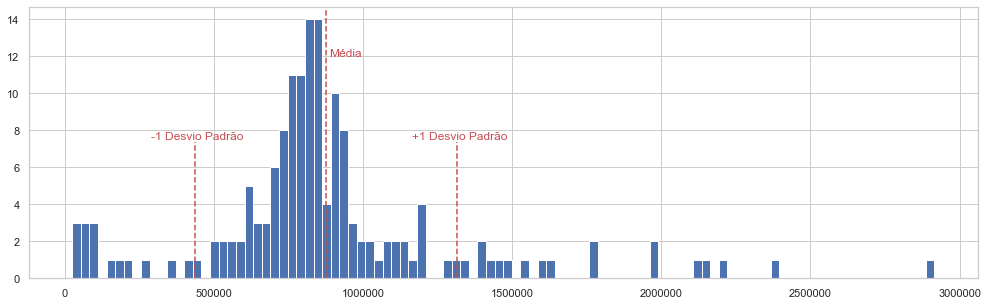

Média: 876159.96875
Desvio Padrão: 438210.5955586063
Teste de aproximação da distribuição normal: p-value = 1.0857201332109742e-08, os dados NÃO VIERAM de uma distribuição normal.


In [11]:
def plot_histogram_serie(serie, correct_format=False, plot_lines=False, print_=False):
    # Plotando a distribuição dos valores do label.
    fig, ax = plt.subplots(figsize=(17, 5))
    serie.hist(bins=100, ax=ax)
    if correct_format:
        ax.ticklabel_format(style='sci', scilimits=(-1,7), axis='both')
    if plot_lines:
        mean_faturamento = serie.mean()
        std_faturamento = serie.std()
        ax.axvline(x=mean_faturamento, ymin=0, ymax=1, color='r', linestyle='--')
        ax.axvline(x=(mean_faturamento-std_faturamento), ymin=0, ymax=0.5, color='r', linestyle='--')
        ax.axvline(x=(mean_faturamento+std_faturamento), ymin=0, ymax=0.5, color='r', linestyle='--')
        ax.annotate('Média', (mean_faturamento+10000, 12), color='r')
        ax.annotate('-1 Desvio Padrão', ((mean_faturamento-std_faturamento)-150000, 7.5), color='r')
        ax.annotate('+1 Desvio Padrão', ((mean_faturamento+std_faturamento)-150000, 7.5), color='r')
    plt.show()
    if print_:
        print('Média:', mean_faturamento)
        print('Desvio Padrão:', std_faturamento)
        _, p_value = skewtest(serie)
        str_ = 'NÃO VIERAM' if p_value < 0.05 else 'VIERAM'
        print(f'Teste de aproximação da distribuição normal: p-value = {p_value}, os dados {str_} de uma distribuição normal.')

plot_histogram_serie(df_rj[label_faturamento], correct_format=True, plot_lines=True, print_=True)

### 2.1.1. Modelo Preditor de faturamento sem ajustes de parâmetros
Na distribuição acima, o teste estatístico resultou que os dados não vieram não se aproximam de uma distribuição normal. Significa que não podemos usar métrica baseada na média. Em vez disso, vamos usar métricas baseadas na mediana. Com isso e também no fato dos valores serem muito maiores que 1, as métricas de erros medianos são mais adequadas. Escolhemos o "Erro Absoluto Mediano" por trabalhar na mesma escala dos valores de entrada (no caso, valores na moeda Real). Porém, o algoritmo de validação cruzada que vamos utilizar do módulo SKLearn só contempla a negativa dessa métrica. Por isso, vamos nos atentar para observar os valores absolutos produzidos por essa métrica. Também, vamos utilizar 3 folds (k-fold = 3), pois, para termos subamostras mínimas de 50, só podemos dividir nossa amostra, que é de 160, por 3.

Inicialmente, vamos tratar os dados com duas transformações que podemos fazer para problemas de regressão: remoção de outliers e seleção de features (por importância).

In [12]:
# Função para remoção de outliers.
def get_outliers_removed(df, features, label):
    df = df.copy()
    X = df[features].values
    y = df[label].values
    model = IsolationForest(random_state=42)
    model.fit(X, y)
    list_is_inlier = [(True if value == 1 else False) for value in model.predict(X)]
    
    return df[list_is_inlier]

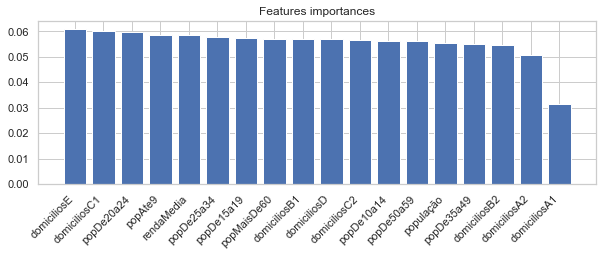

In [13]:
# Função para mostrar gráfico ordenado de features por importância.
def show_features_by_importance(df, features, label):
    df = df.copy()
    X = df[features].values
    y = df[label].values
    model = ExtraTreesClassifier(random_state=42)
    model.fit(X, y)
    importances = model.feature_importances_
    index_more_important = np.argsort(importances)[::-1]
    features_sorted_by_importance = df[features].columns[index_more_important].tolist()
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.set_title('Features importances')
    ax.bar(features_sorted_by_importance, importances[index_more_important])
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Verificando as features ordenadas por importancias.
show_features_by_importance(df_rj, features, label_faturamento)

>***Olhando*** o gráfico acima, quando fizermos seleção de features, podemos descartar somente "domiciliosA1".

In [14]:
# Função que obtem o conjunto de treino/validação com ações de tratamento dos dados.
def get_X_y_with_data_treatment_for_regression(df, features, label, remove_outliers=False, drop_features=[]):
    df = df.copy()
    if remove_outliers:
        df = get_outliers_removed(df, features, label)
    if len(drop_features) > 0:
        X = df[features].drop(drop_features, axis=1).values
    else:
        X = df[features].values
    y = df[label_faturamento].values
    
    return X, y

In [15]:
algorithms_names = ['LinearRegression', 'LGBMRegressor', 'XGBRegressor', 'CatBoostRegressor', 'SGDRegressor', 'KernelRidge',
                    'ElasticNet', 'BayesianRidge', 'GradientBoostingRegressor', 'SVR']
algorithms_models = [LinearRegression(), LGBMRegressor(random_state=42), XGBRegressor(random_state=42),
                     CatBoostRegressor(random_state=42, verbose=0), SGDRegressor(random_state=42),
                     KernelRidge(), ElasticNet(random_state=42), BayesianRidge(),
                     GradientBoostingRegressor(random_state=42), SVR()]

data_treatment_combinations = list(product(['Sem remoção de outliers', 'Com remoção de outliers'],
                                          ['Sem seleção de features', 'Com seleção de features']))

df = pd.DataFrame([['-']*len(data_treatment_combinations)]*len(algorithms_names), index=algorithms_names,
                  columns=[str(data_treatment_combination) for data_treatment_combination in data_treatment_combinations])

for data_treatment_combination in data_treatment_combinations:
    remove_outliers = False
    drop_features = []
    if 'Com remoção de outliers' in data_treatment_combination:
        remove_outliers = True
    if 'Com seleção de features' in data_treatment_combination:
        drop_features = ['domiciliosA1']
    for name_model, model in zip(algorithms_names, algorithms_models):
        X, y = get_X_y_with_data_treatment_for_regression(df_rj, features, label_faturamento,
                                                          remove_outliers=remove_outliers, drop_features=drop_features)
        scores_kfold = cross_val_score(model, X, y,  cv=3, scoring='neg_median_absolute_error')
        score_mean = np.mean(scores_kfold)
        score_std = np.std(scores_kfold)
        df.at[name_model, str(data_treatment_combination)] = (-score_mean, score_std)

gmap = df.apply(lambda x: x.apply(lambda y: min(abs(y[0])/100000, 1.0))).values
df.columns.name = 'Combinações'
df.index.name = 'Algoritmo/Modelo'
df.style.background_gradient(gmap=gmap, cmap='Blues_r', axis=None)

Combinações,"('Sem remoção de outliers', 'Sem seleção de features')","('Sem remoção de outliers', 'Com seleção de features')","('Com remoção de outliers', 'Sem seleção de features')","('Com remoção de outliers', 'Com seleção de features')"
Algoritmo/Modelo,,,,
LinearRegression,"(47299.52301915737, 18384.54592118613)","(47905.3722782589, 17806.069008516253)","(6108.642664032716, 3315.0293478795893)","(8387.664583551581, 2639.513816218934)"
LGBMRegressor,"(69268.31248086599, 24965.80421964242)","(63267.3894131263, 17099.655184806834)","(66002.0113671649, 22810.653392020886)","(64153.76508512802, 24206.399604459137)"
XGBRegressor,"(35513.4375, 6762.195608522181)","(38295.247395833336, 6041.0412579150025)","(41234.083333333336, 10006.231045205519)","(37932.28125, 9293.759357797631)"
CatBoostRegressor,"(28890.07168762677, 5081.6038009704835)","(36841.787319740455, 13956.172153689628)","(26341.9840948319, 10881.95767421699)","(27818.790652885276, 11847.4333976155)"
SGDRegressor,"(2.3926010443790157e+18, 1.3187792100560366e+18)","(1.7592379244772444e+18, 9.629800730136462e+17)","(9.658513867579483e+17, 7.054574543196641e+17)","(8.884532719065962e+17, 6.636764413076756e+17)"
KernelRidge,"(431025.3333333333, 78935.67495180632)","(436898.6666666667, 73816.03090406959)","(340943.4270833333, 26135.773020276338)","(341325.75, 22845.07380181593)"
ElasticNet,"(40328.09982287484, 7801.05597136278)","(39785.26338614776, 9214.467322320255)","(5986.561037349379, 3290.460703661734)","(8128.487669548388, 2211.3098407562147)"
BayesianRidge,"(45225.9328044795, 14485.337070351245)","(42272.775866912525, 18863.772104493048)","(5574.519272962294, 2846.445072780905)","(7732.759539340604, 1865.9905922364715)"
GradientBoostingRegressor,"(45264.93778302472, 8950.430879795043)","(43202.96058866663, 10073.681767367034)","(33934.72572857045, 7288.662073390121)","(33866.92840819901, 10773.284226492224)"


>***A*** três melhores pontuações (valores absolutos mais baixos) ficaram com:
>1. BayesianRidge com remoção de outliers e sem seleção de features (score = 5574.52 / desvio padrão entre os k-folds = 2846.44);
>2. ElasticNet com remoção de outliers e sem seleção de features (score = 5986.56 / desvio padrão entre os k-folds = 3290.46);
>3. LinearRegression com remoção de outliers e sem seleção de features (score = 6108.64 / desvio padrão entre os k-folds = 3315.03).

>***A*** escolha do nosso modelo na etapa seguinte deve levar em consideração também o desvio padrão entre os scores dos k-folds usados na validação cruzada. Vamos, agora, tentar melhorar as pontuações desses três modelos com ajustes de parâmetros.

### 2.1.2. Modelo Preditor de faturamento com ajustes de parâmetros
Até agora não nos preocupamos em guardar o modelo treinado, mas apenas observar o desempenho da validação, pois ainda vamos para as melhorias. Para isso, vamos escolher os parâmetros que podem melhorar os modelos (com exceção do LinearRegression que não possui hiperparâmetros) e aplicar na busca em grade com a função GridSearchCV do Módulo SKLearn, onde podemos treinar/validar por várias vezes o modelo com valores diferentes de vários parâmetros e, ainda, obter o modelo com a configuração que teve o melhor desempenho.

In [16]:
def model_fit_with_params(model, X, y, params, scoring):
    # Ajuste da busca em grade.
    gridsearchcv = GridSearchCV(model, params, cv=3, scoring=scoring)
    gridsearchcv.fit(X, y)
    best_model = gridsearchcv.best_estimator_
    print('- Melhor estimador/preditor:')
    print(best_model)
    print('\n- Melhor score:')
    best_score = gridsearchcv.best_score_
    if scoring.startswith('neg'):
        best_score = -best_score
    print(best_score)
    print('\n- Desvio padrão:')
    std = gridsearchcv.cv_results_['std_test_score'][np.argmax(gridsearchcv.cv_results_['mean_test_score'])]
    print(std)
    print('\n- Melhores valores dos parâmetros trabalhados:')
    print(gridsearchcv.best_params_)
    
    return best_model, best_score, std

In [17]:
# Modelo BayesianRidge com remoção de outliers e sem seleção de features.
params = {
    'alpha_1': [1e-3, 1e-2, 1e-1, 0.0],
    'alpha_2': [1e-3, 1e-2, 1e-1, 0.0],
    'lambda_1': [1e-3, 1e-2, 1e-1, 0.0],
    'lambda_2': [0.0, 1e0, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5] 
}
X, y = get_X_y_with_data_treatment_for_regression(df_rj, features, label_faturamento, remove_outliers=True, drop_features=[])
model_BayesianRidge_faturamento, score_BayesianRidge, std_BayesianRidge = \
    model_fit_with_params(BayesianRidge(), X, y, params, 'neg_median_absolute_error')

- Melhor estimador/preditor:
BayesianRidge(alpha_1=0.0, alpha_2=0.1, lambda_1=0.1, lambda_2=0.0)

- Melhor score:
5570.5146762095

- Desvio padrão:
2851.924283759262

- Melhores valores dos parâmetros trabalhados:
{'alpha_1': 0.0, 'alpha_2': 0.1, 'lambda_1': 0.1, 'lambda_2': 0.0}


In [18]:
# Modelo ElasticNet com remoção de outliers e sem seleção de features.
params = {
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1e0, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5],
    'l1_ratio': np.arange(0, 1, 0.01)
}
X, y = get_X_y_with_data_treatment_for_regression(df_rj, features, label_faturamento, remove_outliers=True, drop_features=[])
model_ElasticNet_faturamento, score_ElasticNet, std_ElasticNet = \
    model_fit_with_params(ElasticNet(), X, y, params, 'neg_median_absolute_error')

- Melhor estimador/preditor:
ElasticNet(alpha=10000.0, l1_ratio=0.75)

- Melhor score:
4948.378699893947

- Desvio padrão:
2432.921756969437

- Melhores valores dos parâmetros trabalhados:
{'alpha': 10000.0, 'l1_ratio': 0.75}


In [19]:
# Modelo LinearRegression com remoção de outliers e sem seleção de features.
params = {}
X, y = get_X_y_with_data_treatment_for_regression(df_rj, features, label_faturamento, remove_outliers=True, drop_features=[])
model_ElasticNet_faturamento, score_LinearRegression, std_LinearRegression = \
    model_fit_with_params(LinearRegression(), X, y, params, 'neg_median_absolute_error')

- Melhor estimador/preditor:
LinearRegression()

- Melhor score:
6108.642664032716

- Desvio padrão:
3315.0293478795893

- Melhores valores dos parâmetros trabalhados:
{}


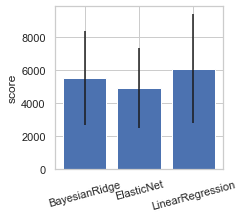

In [20]:
fig, ax =plt.subplots(figsize=(3,3))
ax.bar(['BayesianRidge', 'ElasticNet', 'LinearRegression'], [score_BayesianRidge, score_ElasticNet, score_LinearRegression],
       yerr=[std_BayesianRidge, std_ElasticNet, std_LinearRegression])
ax.set_ylabel('score')
plt.xticks(rotation=15)
plt.show()

>***Após*** ajustes, o melhor modelo ficou para **ElasticNet** por obter o melhor score, em torno de 4948.0, e melhor desvio padrão, em torno de 2433.0, tendo como pior caso a soma deles, em torno de 7381.0 . Isso significa dizer que cada valor de faturamento a ser predito tem um erro máximo de R$ 7381.00 do valor real. Portanto, vamos seguir com a variável **model_ElasticNet_faturamento** para predição que leva nosso melhor modelo.

### 2.1.3. Predição dos valores de faturamento
Com nosso modelo pronto, vamos predizer os valores de faturamento dos bairros de São Paulo. Vamos criar um Dataset a partir do de SP e preencher os dados de faturamento, bem como plotar o histograma para compararmos com o faturamento dos bairros do Rio de Janeiro.

In [21]:
df_sp_predicted = df_sp.copy()
df_sp_predicted[label_faturamento] = model_ElasticNet_faturamento.predict(df_sp_predicted[features].values)
df_sp_predicted

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
160,355030251.0,A. E. Carvalho,São Paulo,SP,94034.0,12668.0,6853.0,9836.0,7487.0,14535.0,...,253.0,2197.0,4368.0,6681.0,7011.0,2247.0,5670.0,1501.0,3.869801e+05,NaN
161,35503020.0,Aclimação,São Paulo,SP,32791.0,2297.0,1017.0,2096.0,2197.0,5341.0,...,1734.0,3704.0,2351.0,1946.0,827.0,291.0,1617.0,5920.0,1.425917e+06,NaN
162,355030285.0,Adventista,São Paulo,SP,104193.0,15070.0,7343.0,10631.0,8657.0,17749.0,...,0.0,1423.0,4875.0,8595.0,10082.0,3111.0,5776.0,1284.0,4.027942e+04,NaN
163,35503088.0,Água Branca,São Paulo,SP,12721.0,953.0,343.0,627.0,819.0,2142.0,...,667.0,1558.0,1032.0,915.0,361.0,84.0,404.0,6278.0,1.118423e+06,NaN
164,35503066.0,Água Funda,São Paulo,SP,48417.0,5078.0,2396.0,4018.0,3571.0,7388.0,...,303.0,1794.0,2986.0,4489.0,2836.0,1104.0,2553.0,1905.0,8.622022e+05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,355030213.0,Vila Sônia,São Paulo,SP,34061.0,2908.0,1462.0,2253.0,2076.0,4579.0,...,1089.0,2866.0,2219.0,2216.0,1227.0,306.0,1098.0,5285.0,1.275856e+06,NaN
452,355030207.0,Vila Suzana,São Paulo,SP,35403.0,4127.0,1890.0,2678.0,2433.0,5855.0,...,1522.0,2458.0,1186.0,1166.0,918.0,209.0,3840.0,7418.0,1.294612e+06,NaN
453,355030162.0,Vila Terezinha,São Paulo,SP,122359.0,18304.0,9304.0,13258.0,9965.0,19248.0,...,0.0,1758.0,4517.0,9450.0,11473.0,3218.0,7540.0,1252.0,-1.242247e+05,NaN
454,355030157.0,Vila Zatt,São Paulo,SP,125864.0,14670.0,7305.0,11225.0,9338.0,18841.0,...,872.0,5093.0,8063.0,10012.0,8082.0,2856.0,6853.0,1936.0,8.135220e+05,NaN


In [22]:
df = df_sp_predicted.sort_values('faturamento', ascending=False).set_index('nome')[['faturamento']]
display(
    'Os 15 bairros de São Paulo que mais faturariam:',
    df.head(15).style.background_gradient(cmap='Blues'),
    '____________________________________________________'
)
df = df_sp_predicted.sort_values('faturamento', ascending=True).set_index('nome')[['faturamento']]
display(
    'Os bairros de São Paulo que dariam prejuízos:',
    df.query('faturamento < 0').style.background_gradient(cmap='Reds_r')
)

'Os 15 bairros de São Paulo que mais faturariam:'

,faturamento
nome,
Moema,2432663.586151
Perdizes,2084683.368790
Vila Mariana,1834717.809247
Trianon,1829816.103885
Saúde,1789779.432175
Chácara Itaim,1749623.387331
Tatuapé,1656255.681506
Pamplona,1655702.854914
Paraíso,1637120.894908


'____________________________________________________'

'Os bairros de São Paulo que dariam prejuízos:'

,faturamento
nome,
Cocaia,-1219952.057492
Cidade Tiradentes,-951139.394129
Jardim Capela,-247806.864573
Iguatemi,-217202.261220
Parque Fernanda,-132244.156474
Parada De Taipas,-131784.823984
Vila Terezinha,-124224.727285
Centro Empresarial,-55532.661134
Fazenda Itaim,-51682.094639


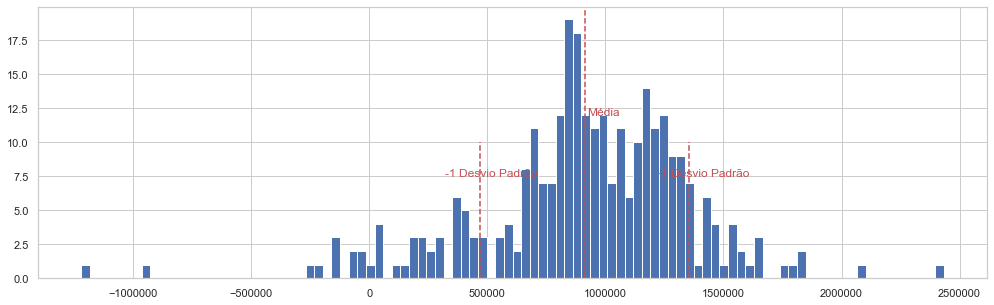

Média: 911661.6456704597
Desvio Padrão: 442376.1491038962
Teste de aproximação da distribuição normal: p-value = 1.9173614362354498e-07, os dados NÃO VIERAM de uma distribuição normal.


In [23]:
plot_histogram_serie(df_sp_predicted[label_faturamento], correct_format=True, plot_lines=True, print_=True)

>***A*** média de faturamento em São Paulo ficou um pouco maior que no Rio de Janeiro. Em ambos o desvio padrão foram próximos. Porém, nosso modelo preditor detectou alguns bairro que poderão dar prejuízos (valores negativos)

>***Até*** este ponto, temos o faturamento dos bairros de São Paulo preditos. Precisamos, agora, predizer o potencial de cada um desses bairros que será nossa próxima etapa.

## 2.2. Modelo Preditor de potencial

Sendo um problema de classificação, vamos formar uma lista de algoritmos dessa natureza. Vamos seguir os mesmos passos para se chegar no melhor modelo de faturamento, porém, vamos utilizar outra métrica de avaliação. Para escolher essa métrica, precisamos do tipo de dados do label, que já sabemos ser categóricos com as classes "Alto", "Médio" e "Baixo". Vamos olhar a distribuição desses dados no Dataset do RJ.

Antes vamos incluir o faturamento como feature, pois os valores dessa feature no Dataset de São Paulo já foram preenchidos e podemos usá-lo na predição.

In [24]:
# Incluindo a feature faturamento.
features = df_raw.columns[4:-1]

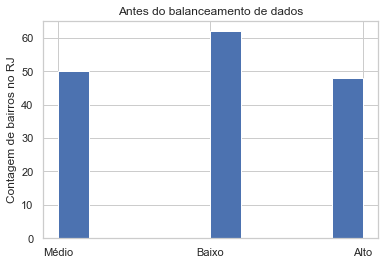

In [25]:
fig, ax = plt.subplots()
df_rj[label_potencial].hist(ax=ax)
ax.set_title('Antes do balanceamento de dados')
ax.set_ylabel('Contagem de bairros no RJ')
plt.show()

>***O*** desbalanceamento entre classes é baixo. Mesmo assim, vamos aplicar a ação de balanceamento nos dados, juntamente com a remoção de outliers e a seleção de features. A nossa aplicação de reamostragem balanceada será do tipo oversampling que aumenta mais nossa amostra, pois não seria bom utilizar meios que reduzem mais ainda a amostra. Para isso, vamos utilizar o método SMOTE do Módulo ImbLearn.

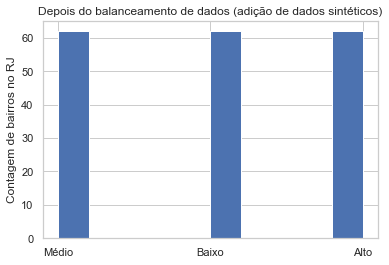

In [26]:
# Função para reamostragem balanceada por oversampling.
def get_balanced_oversampling(df, features, label):
    X = df_rj[features].values
    y = df_rj[label_potencial].values
    smote = SMOTE(random_state=42)
    X_sm, y_sm = smote.fit_resample(X, y)
    df_sm = pd.DataFrame(X_sm, columns=features)
    df_sm[label] = y_sm
    
    return df_sm

df = get_balanced_oversampling(df_rj, features, label_potencial)
fig, ax = plt.subplots()
df[label_potencial].hist(ax=ax)
ax.set_title('Depois do balanceamento de dados (adição de dados sintéticos)')
ax.set_ylabel('Contagem de bairros no RJ')
plt.show()

>***Acima***, é mostrado como ficam balanceados nossos dados com o  algoritmo SMOTE, notando que houve aumento de linhas nas classes em vez de diminuição.

### 2.2.1. Modelo Preditor de potencial sem ajustes de parâmetros
Dessa vez, como é classificação, a métrica de avaliação na validação cruzada será a mais simples: acurácia. Mas também precisamos converter as classes do label em números ordinais para serem aceitos pelo algoritmo. A conversão inversa deverá ser feita quando tivermos preditas as classes de potenciais dos bairros de São Paulo.

In [27]:
# Função que obtem o conjunto de treino/validação com ações de tratamento dos dados.
def get_X_y_with_data_treatment_for_classification(df, features, label, balance_sample=False, remove_outliers=False,
                                                   drop_features=[]):
    df = df.copy()
    if balance_sample:
        df = get_balanced_oversampling(df, features, label)
    if remove_outliers:
        df = get_outliers_removed(df, features, label)
    if len(drop_features) > 0:
        X = df[features].drop(drop_features, axis=1).values
    else:
        X = df[features].values
    y = df[label].map({'Baixo': 0, 'Médio': 1, 'Alto': 2}).values
    
    return X, y

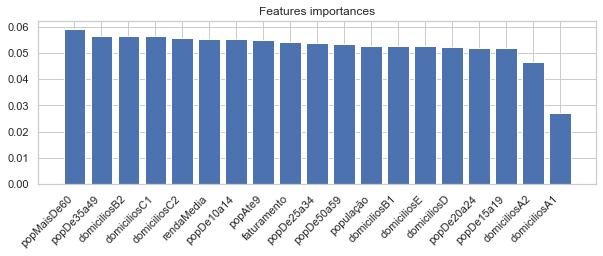

In [28]:
# Verificando novamente as features mais importantes por causa da inclusão de faturamento.
show_features_by_importance(df_rj, features, label_faturamento)

>***Veja*** que continuamos somente com a feature "domiciliosA1" distante das outras em importância.

In [29]:
algorithms_names = ['LogisticRegression', 'SVC', 'GaussianNB', 'MultinomialNB', 'SGDClassifier', 'KNeighborsClassifier',
                    'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'LGBMClassifier',
                    'XGBClassifier']
algorithms_models = [LogisticRegression(random_state=42), SVC(random_state=42), GaussianNB(), MultinomialNB(),
                     SGDClassifier(random_state=42), KNeighborsClassifier(), DecisionTreeClassifier(random_state=42),
                     RandomForestClassifier(random_state=42), GradientBoostingClassifier(random_state=42), LGBMClassifier(),
                     XGBClassifier(random_state=42)]

data_treatment_combinations = list(product(['Sem balanceamento de dados', 'Com balanceamento de dados'],
                                           ['Sem remoção de outliers', 'Com remoção de outliers'],
                                           ['Sem seleção de features', 'Com seleção de features']))

df = pd.DataFrame([['-']*len(data_treatment_combinations)]*len(algorithms_names), index=algorithms_names,
                  columns=[str(data_treatment_combination) for data_treatment_combination in data_treatment_combinations])

for name, model in zip(algorithms_names, algorithms_models):
    for data_treatment_combination in data_treatment_combinations:
        balance_sample = False
        remove_outliers = False
        drop_features = []
        if 'Com balanceamento de dados' in data_treatment_combination:
            balance_sample = True
        if 'Com remoção de outliers' in data_treatment_combination:
            remove_outliers = True
        if 'Com seleção de features' in data_treatment_combination:
            drop_features = ['domiciliosA1']
        X, y = get_X_y_with_data_treatment_for_classification(df_rj, features, label_potencial, balance_sample=balance_sample,
                                                              remove_outliers=remove_outliers, drop_features=drop_features)
        scores = cross_val_score(model, X, y,  cv=3, scoring='accuracy')
        score = np.mean(scores)
        std = np.std(scores)
        df.at[name, str(data_treatment_combination)] = score, std

gmap = df.apply(lambda x: x.apply(lambda y: y[0])).values
df.style.background_gradient(gmap=gmap, cmap='Blues', axis=None)

,"('Sem balanceamento de dados', 'Sem remoção de outliers', 'Sem seleção de features')","('Sem balanceamento de dados', 'Sem remoção de outliers', 'Com seleção de features')","('Sem balanceamento de dados', 'Com remoção de outliers', 'Sem seleção de features')","('Sem balanceamento de dados', 'Com remoção de outliers', 'Com seleção de features')","('Com balanceamento de dados', 'Sem remoção de outliers', 'Sem seleção de features')","('Com balanceamento de dados', 'Sem remoção de outliers', 'Com seleção de features')","('Com balanceamento de dados', 'Com remoção de outliers', 'Sem seleção de features')","('Com balanceamento de dados', 'Com remoção de outliers', 'Com seleção de features')"
LogisticRegression,"(0.7874446773817843, 0.039019264200233314)","(0.7811553692056837, 0.03261829812538992)","(0.75177304964539, 0.03616325896165096)","(0.75177304964539, 0.026536577211162704)","(0.8225806451612904, 0.047482585302837894)","(0.8225806451612904, 0.04561979233461598)","(0.8147186147186147, 0.043532599692601905)","(0.8147186147186147, 0.043532599692601905)"
SVC,"(0.5687165152573957, 0.0310432159135015)","(0.5687165152573957, 0.0310432159135015)","(0.524822695035461, 0.043719248248006944)","(0.524822695035461, 0.043719248248006944)","(0.5698924731182795, 0.030413194889744005)","(0.5698924731182795, 0.030413194889744005)","(0.5570346320346321, 0.018980474926625156)","(0.5570346320346321, 0.018980474926625156)"
GaussianNB,"(0.6183321686466341, 0.04971916425439687)","(0.6182156999767062, 0.06093793963217427)","(0.6737588652482268, 0.053073154422325394)","(0.673758865248227, 0.0610093990570399)","(0.6559139784946237, 0.06496261276126113)","(0.6451612903225806, 0.06968538385384798)","(0.7547619047619047, 0.04328490229213775)","(0.7308441558441557, 0.04216031295579943)"
MultinomialNB,"(0.5313300722105754, 0.0248206731981784)","(0.5313300722105754, 0.0248206731981784)","(0.5177304964539007, 0.020059766842171565)","(0.5177304964539008, 0.03616325896165096)","(0.521505376344086, 0.015206597444871977)","(0.521505376344086, 0.015206597444871977)","(0.5271645021645021, 0.026800085785585216)","(0.5091991341991342, 0.026652836268451822)"
SGDClassifier,"(0.29990682506405775, 0.013055924908074805)","(0.29990682506405775, 0.013055924908074805)","(0.39716312056737585, 0.08569536151485511)","(0.39716312056737585, 0.08569536151485511)","(0.3440860215053763, 0.020116437563300768)","(0.3440860215053763, 0.020116437563300768)","(0.3170995670995671, 0.03137595024745505)","(0.3170995670995671, 0.03137595024745505)"
KNeighborsClassifier,"(0.6688795713952946, 0.048485950655425304)","(0.6688795713952946, 0.048485950655425304)","(0.6595744680851063, 0.05211680303793999)","(0.6595744680851063, 0.05211680303793999)","(0.6881720430107526, 0.020116437563300792)","(0.6881720430107526, 0.020116437563300792)","(0.6706709956709958, 0.02191872405494208)","(0.6706709956709958, 0.02191872405494208)"
DecisionTreeClassifier,"(0.7812718378756115, 0.008089333964213997)","(0.79979035639413, 0.033114400417046774)","(0.7588652482269503, 0.010029883421085795)","(0.75177304964539, 0.053073154422325394)","(0.8440860215053764, 0.06223568227306572)","(0.8172043010752689, 0.06496261276126113)","(0.8265151515151515, 0.041491028024987976)","(0.8324675324675325, 0.04644332705310684)"
RandomForestClassifier,"(0.8873747961798276, 0.027104439125468387)","(0.8876077335196833, 0.026125872390777464)","(0.8723404255319149, 0.03008965026325733)","(0.8439716312056738, 0.026536577211162746)","(0.8924731182795699, 0.007603298722435987)","(0.8978494623655914, 0.03314201076865038)","(0.8862554112554113, 0.007998413946710775)","(0.8743506493506494, 0.013792652099054907)"
GradientBoostingClassifier,"(0.8749126484975541, 0.01830300608484805)","(0.8685068716515257, 0.03152710302344811)","(0.8368794326241135, 0.05014941710542892)","(0.8297872340425533, 0.06263660188884998)","(0.8494623655913979, 0.054828166812825645)","(0.8494623655913979, 0.054828166812825645)","(0.8563852813852814, 0.05232300648068234)"

>***As*** quatro melhores pontuações (maiores acurácias) ficaram com:
>- RandomForestClassifier com balanceamento de dados, sem remoção de outliers e com seleção de features (score = 0.8978 / desvio padrão entre os k-folds = 0.0331);
>- RandomForestClassifier com balanceamento de dados, sem remoção de outliers e sem seleção de features (score = 0.8924 / desvio padrão entre os k-folds = 0.0076);
>- RandomForestClassifier sem balanceamento de dados, sem remoção de outliers e com seleção de features (score = 0.8876 / desvio padrão entre os k-folds = 0.0261);
>- RandomForestClassifier sem balanceamento de dados, sem remoção de outliers e sem seleção de features (score = 0.8874 / desvio padrão entre os k-folds = 0.0271);

>***Vamos*** ajustar seus devidos parâmetros, testá-los novamente e escolher o melhor.

### 2.2.2. Modelo Preditor de potencial com ajustes de parâmetros
Como fizemos no modelo regressor de faturamento, vamos melhorar o modelo classificador de potencial.

In [30]:
### Modelo RandomForestClassifier com balanceamento de dados, sem remoção de outliers e com seleção de features.
params = {
    'n_estimators': [30, 60, 100],
    'max_depth': [None, 2, 3, 4],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}
X, y = get_X_y_with_data_treatment_for_classification(df_rj, features, label_potencial, balance_sample=True,
                                                      remove_outliers=False, drop_features=['domiciliosA1'])
model_RandomForestClassifier_potencial_1, score_RandomForestClassifier_1, std_RandomForestClassifier_1 = \
    model_fit_with_params(RandomForestClassifier(random_state=42), X, y, params, 'accuracy')

- Melhor estimador/preditor:
RandomForestClassifier(n_estimators=30, random_state=42)

- Melhor score:
0.9032258064516129

- Desvio padrão:
0.02633859938476533

- Melhores valores dos parâmetros trabalhados:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


In [31]:
### Modelo RandomForestClassifier com balanceamento de dados, sem remoção de outliers e sem seleção de features.
params = {
    'n_estimators': [30, 60, 100],
    'max_depth': [None, 2, 3, 4],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}
X, y = get_X_y_with_data_treatment_for_classification(df_rj, features, label_potencial, balance_sample=True,
                                                      remove_outliers=False, drop_features=[])
model_RandomForestClassifier_potencial_2, score_RandomForestClassifier_2, std_RandomForestClassifier_2 = \
    model_fit_with_params(RandomForestClassifier(random_state=42), X, y, params, 'accuracy')

- Melhor estimador/preditor:
RandomForestClassifier(min_samples_leaf=2, random_state=42)

- Melhor score:
0.8978494623655914

- Desvio padrão:
0.007603298722435988

- Melhores valores dos parâmetros trabalhados:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [32]:
### Modelo RandomForestClassifier sem balanceamento de dados, sem remoção de outliers e com seleção de features.
params = {
    'n_estimators': [30, 60, 100],
    'max_depth': [None, 2, 3, 4],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}
X, y = get_X_y_with_data_treatment_for_classification(df_rj, features, label_potencial, balance_sample=False,
                                                      remove_outliers=False, drop_features=['domiciliosA1'])
model_RandomForestClassifier_potencial_3, score_RandomForestClassifier_3, std_RandomForestClassifier_3 = \
    model_fit_with_params(RandomForestClassifier(random_state=42), X, y, params, 'accuracy')

- Melhor estimador/preditor:
RandomForestClassifier(max_depth=4, min_samples_split=4, n_estimators=30,
                       random_state=42)

- Melhor score:
0.9000698812019566

- Desvio padrão:
0.017315879375770615

- Melhores valores dos parâmetros trabalhados:
{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 30}


In [33]:
### Modelo RandomForestClassifier sem balanceamento de dados, sem remoção de outliers e sem seleção de features.
params = {
    'n_estimators': [30, 60, 100],
    'max_depth': [None, 2, 3, 4],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}
X, y = get_X_y_with_data_treatment_for_classification(df_rj, features, label_potencial, balance_sample=False,
                                                      remove_outliers=False, drop_features=[])
model_RandomForestClassifier_potencial_4, score_RandomForestClassifier_4, std_RandomForestClassifier_4 = \
    model_fit_with_params(RandomForestClassifier(random_state=42), X, y, params, 'accuracy')

- Melhor estimador/preditor:
RandomForestClassifier(n_estimators=60, random_state=42)

- Melhor score:
0.899953412532029

- Desvio padrão:
0.00933349429753048

- Melhores valores dos parâmetros trabalhados:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}


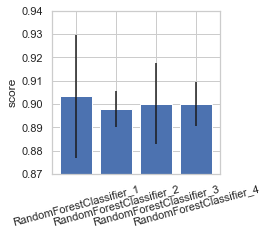

In [34]:
fig, ax =plt.subplots(figsize=(3,3))
ax.bar(['RandomForestClassifier_1', 'RandomForestClassifier_2', 'RandomForestClassifier_3', 'RandomForestClassifier_4'],
       [score_RandomForestClassifier_1, score_RandomForestClassifier_2, score_RandomForestClassifier_3,
        score_RandomForestClassifier_4],
       yerr=[std_RandomForestClassifier_1, std_RandomForestClassifier_2, std_RandomForestClassifier_3,
             std_RandomForestClassifier_4])
ax.set_ylabel('score')
plt.ylim([0.87, 0.94])
plt.xticks(rotation=15)
plt.show()

>***O*** modelo RandomForestClassifier_1 (com balanceamento de dados, sem remoção de outliers e comm seleção de features) teve a maior acurácia com 0.9032 mas um desvio padrão de 0.0263. Isso significa que no pior caso esse modelo pode prever incorretamente 12.31% dos casos (1 - acurácia + desvio padrão), enquanto que RandomForestClassifier_2 e RandomForestClassifier_4 podem prever nos piores caso 10.98% e 10.94%, respectivamente. São praticamente iguais para o pior caso, mas o RandomForestClassifier_4 pode acertar mais no melhor caso, sendo 90.54% e 90.92% (acurácia + desvio padrão). O vencedor fica com RandomForestClassifier_4. Portanto, vamos utilizar a variável **model_RandomForestClassifier_potencial_4** para fazer as predições de potenciais dos bairros de São Paulo.

### 2.2.3. Predição dos valores de potencial
Com nosso modelo pronto, vamos predizer os valores de potencial dos bairros de São Paulo. Vamos fazer isso no mesmo Dataset criado a partir do de SP e preencher os dados de potencial, bem como plotar a distribuição para compararmos com o potencial dos bairros do Rio de Janeiro. Não devemos esquecer de retornar os dados de potencial de números para nomes das classes (de 0, 1 e 2 para Baixo, Médio e Alto).

In [35]:
X, y = get_X_y_with_data_treatment_for_classification(df_sp_predicted, features, label_potencial, balance_sample=False,
                                                      remove_outliers=False, drop_features=[])
df_sp_predicted[label_potencial] = model_RandomForestClassifier_potencial_4.predict(X)
df_sp_predicted[label_potencial] = df_sp_predicted[label_potencial].map({0: 'Baixo', 1: 'Médio', 2: 'Alto'})
df_sp_predicted

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
160,355030251.0,A. E. Carvalho,São Paulo,SP,94034.0,12668.0,6853.0,9836.0,7487.0,14535.0,...,253.0,2197.0,4368.0,6681.0,7011.0,2247.0,5670.0,1501.0,3.869801e+05,Alto
161,35503020.0,Aclimação,São Paulo,SP,32791.0,2297.0,1017.0,2096.0,2197.0,5341.0,...,1734.0,3704.0,2351.0,1946.0,827.0,291.0,1617.0,5920.0,1.425917e+06,Alto
162,355030285.0,Adventista,São Paulo,SP,104193.0,15070.0,7343.0,10631.0,8657.0,17749.0,...,0.0,1423.0,4875.0,8595.0,10082.0,3111.0,5776.0,1284.0,4.027942e+04,Médio
163,35503088.0,Água Branca,São Paulo,SP,12721.0,953.0,343.0,627.0,819.0,2142.0,...,667.0,1558.0,1032.0,915.0,361.0,84.0,404.0,6278.0,1.118423e+06,Alto
164,35503066.0,Água Funda,São Paulo,SP,48417.0,5078.0,2396.0,4018.0,3571.0,7388.0,...,303.0,1794.0,2986.0,4489.0,2836.0,1104.0,2553.0,1905.0,8.622022e+05,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,355030213.0,Vila Sônia,São Paulo,SP,34061.0,2908.0,1462.0,2253.0,2076.0,4579.0,...,1089.0,2866.0,2219.0,2216.0,1227.0,306.0,1098.0,5285.0,1.275856e+06,Alto
452,355030207.0,Vila Suzana,São Paulo,SP,35403.0,4127.0,1890.0,2678.0,2433.0,5855.0,...,1522.0,2458.0,1186.0,1166.0,918.0,209.0,3840.0,7418.0,1.294612e+06,Alto
453,355030162.0,Vila Terezinha,São Paulo,SP,122359.0,18304.0,9304.0,13258.0,9965.0,19248.0,...,0.0,1758.0,4517.0,9450.0,11473.0,3218.0,7540.0,1252.0,-1.242247e+05,Médio
454,355030157.0,Vila Zatt,São Paulo,SP,125864.0,14670.0,7305.0,11225.0,9338.0,18841.0,...,872.0,5093.0,8063.0,10012.0,8082.0,2856.0,6853.0,1936.0,8.135220e+05,Alto


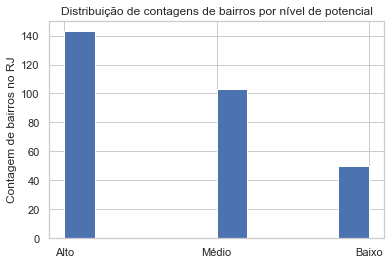

In [36]:
fig, ax = plt.subplots()
df_sp_predicted[label_potencial].hist(ax=ax)
ax.set_title('Distribuição de contagens de bairros por nível de potencial')
ax.set_ylabel('Contagem de bairros no RJ')
plt.show()

>***Percebemos***, proporcionalmente, que São Paulo tem mais bairros com potenciais Alto e Médio em relação ao Rio de Janeiro.

# 3. Segmentação dos bairros de São Paulo
Temos que segmentar de acordo com a renda e a idade, indicando aqueles com maior aderência ao público alvo que são adultos de 25 a 50 anos das classes A (rendas A1 e A2) e B (rendas B1 e B2). Os públicos alvos já estão divididos em classes e as devidas populações devemos simplesmente somar para as idades alvos, bem como as contagens de domicílios alvos. 

Aplicaremos um modelo de Machine Learning não-supervisionado para separarmos em clusters com as features interessadas (público alvo, renda média e potencial). Não sabemos quantos clusters devemos dividir. Portanto, usaremos uma ferramenta capaz de nos mostrar, através de alguma métrica, a distância entre eles para sabermos em quantos clusters devemos dividir. O modelo K-Means é o mais usado por ser simples e rápido, porém só deve funcionar se a disposição dos dados estiverem em forma de círculos. Do contrário, será melhor utilizar outro modelo. Seguiremos a metodologia de escolha de modelo na documentação oficial de Clustering do módulo "sklearn" que pode ser acessado neste link: https://scikit-learn.org/stable/modules/clustering.html

Primeiramente, vamos observar a disposição dos dados em plano 2D. Como temos quatro dimensões, vamos ter que converter em duas. Para isso, podemos usar metodologias como o PCA. Como a feature potencial é categórica, vamos converter em números, por níveis de 1 a 3.

In [37]:
df_sp_segmentation = df_sp_predicted.copy()

# Convertendo os níveis de potencial em números (Baixo=1, Médio=2 e Alto=3).
df_sp_segmentation['potencial_num'] = df_sp_segmentation['potencial'].map({'Baixo': 1, 'Médio': 2, 'Alto': 3})

# Somando as populações com idades alvos.
df_sp_segmentation['popIdadeAlvo'] = df_sp_segmentation[['popDe25a34', 'popDe35a49']].sum(axis=1)

# Somando as contagens de domicílios alvos.
df_sp_segmentation['domiciliosAlvo'] = df_sp_segmentation[
    ['domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2']].sum(axis=1)

df_sp_segmentation.head()

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial,potencial_num,popIdadeAlvo,domiciliosAlvo
160,355030251.0,A. E. Carvalho,São Paulo,SP,94034.0,12668.0,6853.0,9836.0,7487.0,14535.0,...,6681.0,7011.0,2247.0,5670.0,1501.0,3.869801e+05,Alto,3,36084.0,6818.0
161,35503020.0,Aclimação,São Paulo,SP,32791.0,2297.0,1017.0,2096.0,2197.0,5341.0,...,1946.0,827.0,291.0,1617.0,5920.0,1.425917e+06,Alto,3,12622.0,9202.0
162,355030285.0,Adventista,São Paulo,SP,104193.0,15070.0,7343.0,10631.0,8657.0,17749.0,...,8595.0,10082.0,3111.0,5776.0,1284.0,4.027942e+04,Médio,2,41113.0,6298.0
163,35503088.0,Água Branca,São Paulo,SP,12721.0,953.0,343.0,627.0,819.0,2142.0,...,915.0,361.0,84.0,404.0,6278.0,1.118423e+06,Alto,3,4975.0,3881.0
164,35503066.0,Água Funda,São Paulo,SP,48417.0,5078.0,2396.0,4018.0,3571.0,7388.0,...,4489.0,2836.0,1104.0,2553.0,1905.0,8.622022e+05,Alto,3,18139.0,5083.0


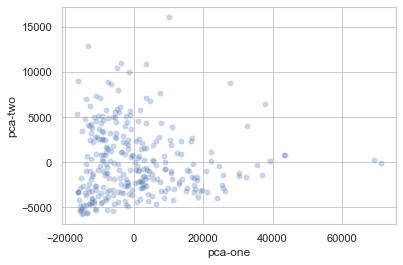

In [38]:
# Cálculo das duas componentes principais.
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_sp_segmentation[['popIdadeAlvo', 'domiciliosAlvo', 'rendaMedia', 'potencial_num']].values)
df_sp_segmentation['pca-one'] = pca_result[:,0]
df_sp_segmentation['pca-two'] = pca_result[:,1]

# Plota a disposição dos dados.
plt.figure()
sns.scatterplot(
    x="pca-one", y="pca-two",
    palette='tab10',
    data=df_sp_segmentation,
    legend="full",
    alpha=0.3
)
plt.show()

>***Como*** podemos observar, os dados não estão dispostos em forma circular e, por isso, o modelo K-Means não é o adequado para ser aplicado. Naturalmente, não conseguimos encontrar de forma visual os clusters nessa imagem e, como boa prática, um modelo do tipo hierárquico é mais adequado. Observando a documentação de Clustering do módulo "sklearn", o modelo Agglomerative Clustering é uma boa escolha e vamos utilizá-lo. Antes, devemos usar uma ferramenta, também hierárquica, para decidirmos a quantidade de clusters a separar. Estamos falando do Dendograma que vamos plotar a seguir.

In [39]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

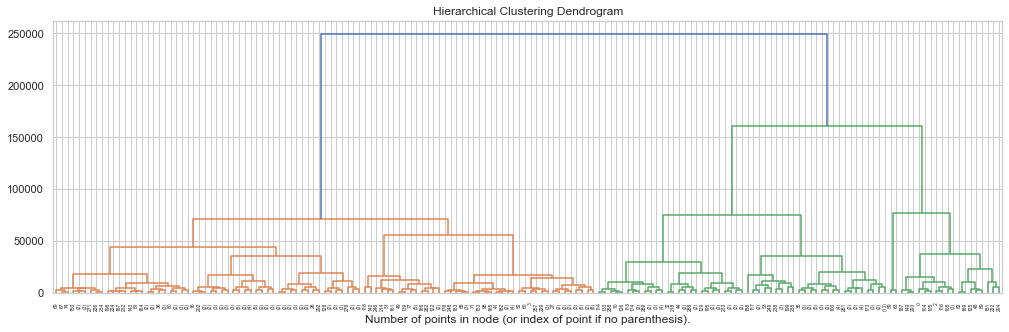

In [40]:
# Faz uma predição com um modelo hierárquico sem contagem de clusters.
model_agglom_clust = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model_agglom_clust = model_agglom_clust.fit(df_sp_segmentation[['popIdadeAlvo', 'domiciliosAlvo', 'rendaMedia', 'potencial_num']].values)

# Plota o dendograma.
plt.figure(figsize=(17, 5))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model_agglom_clust, truncate_mode="level", p=7)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

>***A*** linha azul é o ponto suferido pela ferramenta para a melhor divisão de clusters, significando aqui que ela separa em dois, sendo um na cor laranja e outro na cor verde. Como outra sugestão, podemos usar três grupos em vez de dois, passando uma linha horizontal imaginária na altura do valor 100000 no eixo y, onde um dos grupos continuará na cor laranja e os outros dois resultarão da divisão daqueles na cor verde, pois a linha imaginária corta o verde em duas partes. Mas continuaremos com a melhor sugestão da ferramente, ou seja, dividir em dois clusters. Sendo assim, vamos treinar o Modelo de Clustering para dois grupos, fazer a predição e plotar novamente a disposição dos dados já rotulados com essa divisão em dois clusters.

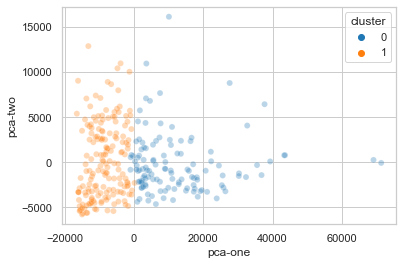

In [41]:
# Treina o modelo para dois clusters.
model_agglom_clust = AgglomerativeClustering(n_clusters=2)
model_agglom_clust = model_agglom_clust.fit(df_sp_segmentation[['popIdadeAlvo', 'domiciliosAlvo', 'rendaMedia', 'potencial_num']].values)

# Rotula os dados segundo o cluster pertencente.
df_sp_segmentation['cluster'] = model_agglom_clust.labels_

# Plota a disposição dos dados novamente com os dados rotulados por cluster.
plt.figure()
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="cluster",
    palette='tab10',
    data=df_sp_segmentation,
    legend="full",
    alpha=0.3
)
plt.show()

>***É*** difícil determinar uma separação natural nos dados mostrados no gráfico acima. Esperávamos que mostrasse. O mais importante é que essa separação seja melhor visualizada não com componentes do PCA, mas com valores que podemos entender, como as idades e classes sociais alvo, bem como a renda média e potencial. Faremos isso agora, mostrando um novo gráfico com essas features e incluindo os clusters.

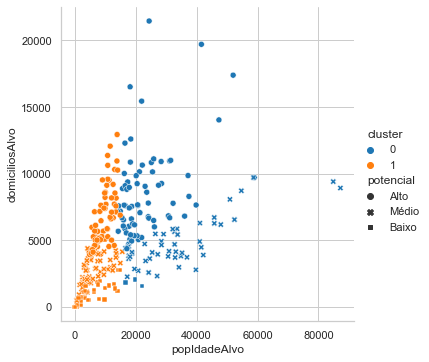

In [42]:
g = sns.relplot(data=df_sp_segmentation, x='popIdadeAlvo', y='domiciliosAlvo', hue='cluster', style='potencial',
                palette='tab10')

>***Observando*** o gráfico disperso e segregado acima, conseguimos separar visualmente uma região que nos mostra os bairros mais propensos a terem maiores rendas médias com alto potencial e dentro do público alvo. É a região compreendida pelo cluster 1 (cor laranja) e pelo potencial Alto (forma de círculo). Para obtermos a lista dos bairros com maior aderência ao público alvo, basta filtrar nosso Dataset de forma que o cluster seja o 1 e o nível de potencial seja o Alto.

In [43]:
df_sp_segmentation_adherent = df_sp_segmentation.query('potencial == "Alto" and cluster == 1')
df_sp_segmentation_adherent

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosE,rendaMedia,faturamento,potencial,potencial_num,popIdadeAlvo,domiciliosAlvo,pca-one,pca-two,cluster
161,35503020.0,Aclimação,São Paulo,SP,32791.0,2297.0,1017.0,2096.0,2197.0,5341.0,...,1617.0,5920.0,1.425917e+06,Alto,3,12622.0,9202.0,-2582.110545,4081.061904,1
163,35503088.0,Água Branca,São Paulo,SP,12721.0,953.0,343.0,627.0,819.0,2142.0,...,404.0,6278.0,1.118423e+06,Alto,3,4975.0,3881.0,-10854.323506,903.596915,1
165,35503052.0,Água Rasa,São Paulo,SP,26134.0,2102.0,996.0,1694.0,1553.0,3625.0,...,1510.0,5907.0,1.237846e+06,Alto,3,9462.0,5698.0,-6154.229168,1792.218789,1
167,35503097.0,Alfredo Pujol,São Paulo,SP,39310.0,2720.0,1317.0,2422.0,2351.0,5431.0,...,1561.0,6586.0,1.619215e+06,Alto,3,13888.0,10954.0,-1176.505878,5725.545494,1
168,355030146.0,Alto Da Lapa,São Paulo,SP,15551.0,1160.0,507.0,911.0,757.0,1967.0,...,379.0,8303.0,1.178428e+06,Alto,3,5524.0,4083.0,-10504.823112,2564.518359,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,35503041.0,Vila Monumento,São Paulo,SP,20177.0,1646.0,760.0,1284.0,1149.0,2844.0,...,515.0,5249.0,1.175612e+06,Alto,3,7340.0,5023.0,-8263.113724,862.374855,1
443,355030133.0,Vila Olímpia,São Paulo,SP,22235.0,1269.0,452.0,1085.0,1482.0,4735.0,...,986.0,7754.0,1.422727e+06,Alto,3,9857.0,8551.0,-5589.832322,5054.057120,1
445,35503053.0,Vila Prudente,São Paulo,SP,37320.0,3122.0,1500.0,2346.0,2195.0,5162.0,...,1574.0,4497.0,1.241955e+06,Alto,3,13546.0,7582.0,-1730.647752,1940.852384,1
451,355030213.0,Vila Sônia,São Paulo,SP,34061.0,2908.0,1462.0,2253.0,2076.0,4579.0,...,1098.0,5285.0,1.275856e+06,Alto,3,12136.0,7116.0,-3266.138410,2237.987187,1


In [44]:
df = df_sp_segmentation_adherent.sort_values('rendaMedia', ascending=False).set_index('nome')[['rendaMedia', 'potencial']]
display(
    'Os 15 bairros mais aderentes ao público alvo com maiores potenciais e renda média preditos:',
    df.head(15).style.background_gradient(cmap='Blues', vmin=14504.0*0.25, vmax=14504.0),
    '____________________________________________________'
)
df = df_sp_segmentation_adherent.sort_values('rendaMedia', ascending=True).set_index('nome')[['rendaMedia', 'potencial']]
display(
    'Os 15 bairros mais aderentes ao público alvo com menores potenciais e renda média preditos:',
    df.head(15).style.background_gradient(cmap='Blues', vmin=5764.0, vmax=14504.0*1.125)
)

'Os 15 bairros mais aderentes ao público alvo com maiores potenciais e renda média preditos:'

,rendaMedia,potencial
nome,,
Morumbi,14504.000000,Alto
Viera De Morais,13650.000000,Alto
Chácara Klabin,13218.000000,Alto
Real Parque,12706.000000,Alto
Trianon,12550.000000,Alto
Chácara Itaim,12424.000000,Alto
Paraíso,11686.000000,Alto
Chácara Flora,11500.000000,Alto
Joaquim Nabuco,11335.000000,Alto


'____________________________________________________'

'Os 15 bairros mais aderentes ao público alvo com menores potenciais e renda média preditos:'

,rendaMedia,potencial
nome,,
Penha,2121.000000,Alto
São Lucas,2222.000000,Alto
Ladeira Da Memória,2360.000000,Alto
Santa Clara,2419.000000,Alto
Ipiranga,3427.000000,Alto
Oratório,3694.000000,Alto
Casa Verde,3862.000000,Alto
Mooca,4111.000000,Alto
Tucuruvi,4198.000000,Alto


>***Obtemos***, então, uma tabela com 72 bairros de alto níveis de potencial e de renda média com aderência ao público alvo de pessoas com idades entre 25 e 50 anos e em domicílios das classes A e B.

# Conclusão
Criamos dois modelos preditores baseados nos algoritmos ElasticNet e RandomForestClassifier, para prevermos faturamento e nível de potencial, respectivamente, dos bairros de São Paulo tomando como referência dados dos bairros do Rio de Janeiro.

Para se chegar nesses modelos, passamos por vários outros, onde pudemos testar cada um deles e escolher o que teve melhor desempenho segundo as métricas que melhor convinha com os tipos de problemas, sendo a métrica "erro mediano absoluto" para o problema de regressão (predição de faturamento) e a métrica "acurácia" para o problema de classificação (predição de nível de potencial). Para este último, utilizamos os dados preditos de faturamento dos bairros de São Paulo uma vez que já tínhamos pronto o modelo preditor para tal.

O "erro mediano absoluto" para o modelo escolhido de predição de faturamento (ElasticNet) foi de R$ 4948.37 no teste/validação e a "acurácia" para o modelo escolhido de predição de nível de potencial (RandomForestClassifier) foi de 89.99\% no teste/validação. A decisão de escolha desses modelos não foi baseada somente nessas métricas, mas também pelo menor desvio padrão obtido das pontuações dessas métricas em cada subamostra no processo de validação cruzada (mais de uma subamostra é treinada e testada e a pontuação final é a média das pontuações de cada uma delas).

Conseguimos segmentar os bairros de São Paulo pelo público alvo de população com idades entre 25 e 50 anos e domicílios das classes A e B. Porém, tivemos que criar os clusters 1 e 2 com o objetivo de indicar os bairros com maior aderência ao público alvo em um deles, resultando numa tabela de 72 bairros aderentes a esse público alvo.